In [309]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [310]:
df_main = pd.read_csv('/Users/ojasbardiya/Downloads/vgsales_data.csv')

In [311]:
df_main.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')

In [312]:
df_main.shape

(55792, 23)

In [313]:
df_main.isnull().sum()

Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       32169
Platform              0
Publisher             0
Developer            17
VGChartz_Score    55792
Critic_Score      49256
User_Score        55457
Total_Shipped     53965
Global_Sales      36377
NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270
Year                979
Last_Update       46606
url                   0
status                0
Vgchartzscore     54993
img_url               0
dtype: int64

In [314]:
df_main.head(10)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,...,NaN,NaN,NaN,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,...,NaN,NaN,NaN,NaN,1989.0,NaN,http://www.vgchartz.com/game/4534/tetris/?regi...,1,NaN,/games/boxart/3740960ccc.jpg
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,8.6,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35076/new-super-m...,1,9.1,/games/boxart/full_1410872AmericaFrontccc.jpg
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,...,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,http://www.vgchartz.com/game/47724/minecraft/?...,1,NaN,/games/boxart/full_minecraft_1AmericaFront.png


In [315]:
#Only keep columns of interest
df_first = df_main.drop(df_main.columns[[8, 10, 18, 19, 20, 21, 22]], axis=1)

In [316]:
df_first.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'Critic_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year'],
      dtype='object')

## Exploratory Analysis

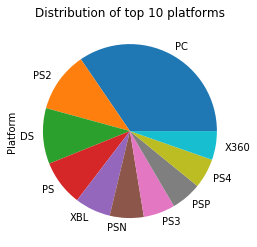

In [317]:
#Top 10 platforms
platforms = df_first['Platform'].value_counts(ascending=False)
top10_platforms = platforms.head(10)
top10_platforms.plot(kind="pie", title="Distribution of top 10 platforms")

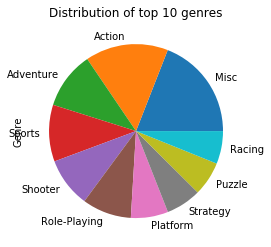

In [318]:
#Top 10 genres
genres = df_first['Genre'].value_counts(ascending=False)
top10_genres = genres.head(10)
top10_genres.plot(kind="pie", title="Distribution of top 10 genres")

In [319]:
#Create a copy of main dataframe
df_second = df_first.loc[:,:]

In [320]:
#Determining total sales
for i in range(len(df_second)):
    if not pd.isna(df_second.loc[i,'Global_Sales']):
        df_second.loc[i,'Total_Sales']  = df_second.loc[i,'Global_Sales']
    elif not pd.isna(df_second.loc[i,'Total_Shipped']):
        df_second.loc[i,'Total_Sales']  = df_second.loc[i,'Total_Shipped']
    else:
        df_second.loc[i,'Total_Sales']  = df_second.loc[i,'NA_Sales'] + df_second.loc[i,'PAL_Sales'] + df_second.loc[i,'JP_Sales'] + df_second.loc[i,'Other_Sales']

In [321]:
#Bestselling games
bestsellers = df_second[['Name','Total_Sales']]
bestsellers = bestsellers.groupby('Name',as_index=False).sum()
bestsellers = bestsellers.sort_values(by=['Total_Sales'],ascending=False)

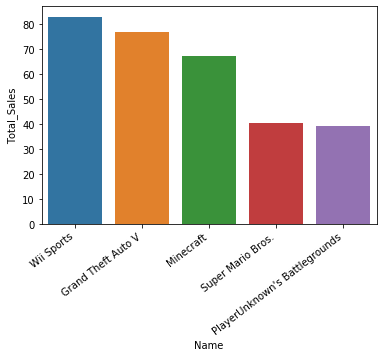

In [322]:
bestsellers = bestsellers.head(5)
ax = sns.barplot(x = "Name", y ="Total_Sales", data=bestsellers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=37.5, ha="right")
plt.show()

In [323]:
df_third = df_second.loc[:,:]

In [324]:
#Filter out null values acc. to Year
df_second = df_first[df_first['Year'].notna()]
df_second = df_second.sort_values('Year', ascending=True)
df_second.isnull().sum()

Rank                 0
Name                 0
basename             0
Genre                0
ESRB_Rating      31290
Platform             0
Publisher            0
Developer           14
Critic_Score     48281
Total_Shipped    52986
Global_Sales     35436
NA_Sales         41855
PAL_Sales        41648
JP_Sales         47778
Other_Sales      39317
Year                 0
Total_Sales      33609
dtype: int64

## Distribution of genres for top 10 platforms as a stacked bar chart

In [325]:
df_platforms = df_first[df_first['Platform'].isin(top10_platforms.index)]
df_vis1 = df_platforms[['Platform', 'Genre']]

In [326]:
df_vis1.head(20)

,Platform,Genre
3,PC,Shooter
6,DS,Platform
9,PC,Misc
12,X360,Party
13,DS,Simulation
14,DS,Racing
19,PS3,Action
20,PS4,Action
21,DS,Misc
22,PC,Misc


In [327]:
Genre_counts = pd.crosstab(df_vis1['Platform'], df_vis1['Genre'])

In [328]:
Genre_counts

Genre,Action,Action-Adventure,Adventure,Board Game,Education,Fighting,MMO,Misc,Music,Party,Platform,Puzzle,Racing,Role-Playing,Sandbox,Shooter,Simulation,Sports,Strategy,Visual Novel
Platform,,,,,,,,,,,,,,,,,,,,
DS,376,4,406,0,0,44,0,865,2,0,121,351,88,259,0,53,403,197,123,0
PC,1131,158,1605,1,9,124,37,1392,10,9,387,528,518,1049,5,1037,890,534,1502,52
PS,233,0,241,0,0,175,0,437,0,2,97,134,232,212,0,172,152,396,219,1
PS2,446,0,523,0,0,212,1,494,0,2,138,52,327,280,0,245,164,560,118,2
PS3,363,37,99,0,0,88,4,413,13,1,54,15,113,140,0,203,37,243,36,11
PS4,355,112,160,0,0,86,11,142,30,12,86,46,79,216,1,154,61,113,48,43
PSN,269,4,143,0,0,106,2,195,0,2,150,211,145,209,0,261,70,127,110,0
PSP,193,2,338,0,0,87,0,349,3,3,44,83,79,230,0,61,62,179,75,16
X360,303,31,84,0,0,82,0,288,22,3,42,14,126,109,0,250,49,254,35,9


In [329]:
#fig = plt.figure(figsize=(15, 8))
#ax = fig.add_subplot(1, 1, 1)
#Genre_counts.plot.barh(ax=ax, width=0.5, stacked=True)
#ax.legend(bbox_to_anchor=(1.1,1), loc='upper left')

## Genre Sales per year

In [330]:
df_vis2 = df_second[['Genre', 'Total_Sales', 'Year']]

In [331]:
df_vis2 = df_vis2.astype({'Year': int})

In [332]:
df_vis2.Genre.unique()

array(['Puzzle', 'Sports', 'Role-Playing', 'Action', 'Adventure',
       'Racing', 'Shooter', 'Strategy', 'Misc', 'Fighting', 'Platform',
       'Simulation', 'Action-Adventure', 'Music', 'Visual Novel',
       'Education', 'Sandbox', 'Party', 'MMO', 'Board Game'], dtype=object)

In [333]:
df_vis2.Genre = df_vis2.Genre.apply(lambda x: 'Other' if x not in top10_genres else x)

In [334]:
df_vis2.isnull().sum()

Genre              0
Total_Sales    33609
Year               0
dtype: int64

In [335]:
df_vis2 = df_vis2[df_vis2['Total_Sales'].notna()]

In [336]:
df_vis2.isnull().sum()

Genre          0
Total_Sales    0
Year           0
dtype: int64

In [337]:
df_vis2 = df_vis2.groupby(['Genre', 'Year'])['Total_Sales'].sum().reset_index()

In [338]:
df_vis2.head(10)

,Genre,Year,Total_Sales
0,Action,1970,0.21
1,Action,1977,1.25
2,Action,1978,1.18
3,Action,1979,0.31
4,Action,1981,1.88
5,Action,1982,14.45
6,Action,1983,7.15
7,Action,1984,2.63
8,Action,1985,3.95
9,Action,1986,2.86


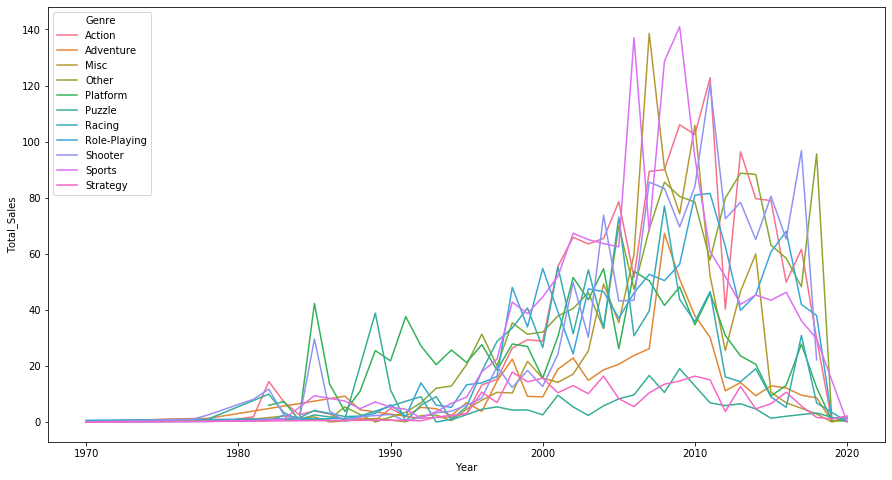

In [339]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x='Year', y='Total_Sales', hue='Genre', data=df_vis2)

## Sales distribution vs Genre and Region Heatmap

In [340]:
df_vis3 = df_second[['Genre','NA_Sales','PAL_Sales','JP_Sales','Other_Sales']]

In [341]:
df_vis3 = df_vis3.groupby('Genre').sum()

In [342]:
df_vis3

,NA_Sales,PAL_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,624.87,367.02,90.64,123.20
Action-Adventure,67.84,62.51,5.60,19.45
Adventure,167.13,98.18,48.33,32.09
Board Game,0.06,0.22,0.02,0.02
Education,0.08,0.00,0.00,0.01
Fighting,184.48,85.28,63.44,30.70
MMO,4.88,3.42,2.36,1.19
Misc,311.61,154.60,68.90,60.78
Music,25.98,15.16,6.74,4.94


In [343]:
import plotly.express as px

In [344]:
fig
fig = px.imshow(df_vis3.T)
fig.update_layout(autosize=False, width=750,height=750,title="Distribution of Sales by Genre and Region (In Millions)")
fig.show()

# Modelling Critic Score as a function of other parameters

## Data Cleaning

### ESRB_Rating

In [557]:
df_final1 = df_first.loc[:,:]

In [558]:
df_first.groupby('ESRB_Rating').agg('count')

,Rank,Name,basename,Genre,Platform,Publisher,Developer,Critic_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Total_Sales
ESRB_Rating,,,,,,,,,,,,,,,,
E,10811,10811,10811,10811,10811,10811,10806,2192,325,5883,5360,4817,846,5697,10761,6208
E10,2897,2897,2897,2897,2897,2897,2897,834,101,1844,1671,1479,322,1792,2887,1945
M,3314,3314,3314,3314,3314,3314,3314,1189,187,2059,1754,1882,678,2005,3311,2246
T,6157,6157,6157,6157,6157,6157,6157,1910,210,3953,3377,3399,1115,3761,6146,4163
outlier,32613,32613,32613,32613,32613,32613,32601,411,1004,5676,802,1612,4082,2267,31708,6680


In [559]:
esrb_ratings = df_first['ESRB_Rating'].value_counts(ascending=False)

In [560]:
highest_count_esrb_ratings = esrb_ratings[esrb_ratings > 500]

In [561]:
highest_count_esrb_ratings

outlier    32613
E          10811
T           6157
M           3314
E10         2897
Name: ESRB_Rating, dtype: int64

In [562]:
df_final1.ESRB_Rating = df_final1.ESRB_Rating.apply(lambda x: 'outlier' if x not in highest_count_esrb_ratings else x)

In [563]:
df_final1 = df_final1[df_final1['ESRB_Rating'] != 'outlier']

In [564]:
df_final1.shape

(23179, 17)

In [565]:
df_final1.isnull().sum()

Rank                 0
Name                 0
basename             0
Genre                0
ESRB_Rating          0
Platform             0
Publisher            0
Developer            5
Critic_Score     17054
Total_Shipped    22356
Global_Sales      9440
NA_Sales         11017
PAL_Sales        11602
JP_Sales         20218
Other_Sales       9924
Year                74
Total_Sales       8617
dtype: int64

### Publisher

In [566]:
df_final1['Publisher'].nunique()

893

In [567]:
publishers = df_final1['Publisher'].value_counts(ascending=False)

In [568]:
print(np.mean(publishers))

25.956326987681972


In [569]:
print(np.std(publishers))

106.09807257533838


In [570]:
for i in range(1, len(publishers)):
    s = publishers.head(i).sum()
    cum = publishers.sum()
    if (((s/cum) * 100) >  float(50.00)):
        print(i)
        break


18


In [571]:
publishers = publishers.head(18)

In [572]:
df_final1.Publisher = df_final1.Publisher.apply(lambda x: 'outlier' if x not in publishers else x)

/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [573]:
df_final1 = df_final1[df_final1['Publisher'] != 'outlier']

### Platform

In [574]:
platforms = df_final1['Platform'].value_counts(ascending=False)

In [575]:
platforms

PC       1496
PS2      1109
DS        930
PSN       774
Wii       686
X360      682
PS3       631
GBA       613
PS        588
XB        514
GC        415
PSP       399
XBL       389
GB        270
3DS       259
PS4       233
VC        217
N64       207
XOne      174
DC        166
SAT       159
DSiW      141
WiiU      113
WW         99
NS         88
SNES       88
GEN        87
PSV        66
GG         48
AJ         34
NGage      20
SCD        20
GBC        12
3DO        12
VB         11
And         5
OSX         4
iOS         3
NES         2
Lynx        2
Linux       1
Arc         1
Mob         1
Name: Platform, dtype: int64

In [576]:
top_platforms = platforms[platforms > 150]

In [577]:
df_final1.Platform = df_final1.Platform.apply(lambda x: 'outlier' if x not in top_platforms else x)

In [578]:
df_final1 = df_final1[df_final1['Platform'] != 'outlier']

In [579]:
df_final1.shape

(10911, 17)

### Genre

In [580]:
genres = df_final1['Genre'].value_counts(ascending=False)

In [581]:
genres

Sports              1762
Action              1693
Shooter             1170
Racing              1001
Platform             903
Misc                 830
Role-Playing         816
Adventure            638
Simulation           559
Fighting             519
Puzzle               412
Strategy             404
Action-Adventure     116
Music                 66
MMO                   11
Party                  9
Visual Novel           1
Education              1
Name: Genre, dtype: int64

In [582]:
top_genres = genres[genres > 100]

In [583]:
df_final1.Genre = df_final1.Genre.apply(lambda x: 'outlier' if x not in top_genres else x)

In [584]:
df_final1 = df_final1[df_final1['Genre'] != 'outlier']

In [585]:
df_final1.shape

(10823, 17)

## Implementing the ML Model

In [586]:
df_final2 = df_final1[df_final1['Critic_Score'].notna()]

In [587]:
df_final2.shape

(3600, 17)

In [588]:
df_final2.head(5)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Total_Sales
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,82.86
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,37.14
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,33.09
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,9.4,31.38,NaN,NaN,NaN,NaN,NaN,1998.0,31.38
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,9.1,30.80,NaN,NaN,NaN,NaN,NaN,2006.0,30.80


In [589]:
df_final2['Platform'].nunique()

21

In [590]:
def score_category(row):
    if row['Critic_Score'] >= 8:
        return 'Excellent'
    elif row['Critic_Score'] >= 5:
        return 'Favorable'
    elif row['Critic_Score'] >= 2:
        return 'Poor'
    else:
        return 'Terrible'

In [591]:
categories = df_final2.apply(lambda row: score_category(row), axis=1)
categories.head(20)

0     Favorable
2     Excellent
4     Excellent
5     Excellent
6     Excellent
8     Excellent
11    Favorable
13    Excellent
14    Excellent
15    Excellent
16    Favorable
17    Excellent
21    Excellent
24    Excellent
25    Excellent
28    Excellent
29    Excellent
31    Excellent
33    Excellent
38    Excellent
dtype: object

In [592]:
df_final2['Score_Category'] = categories

/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [524]:
df_final2.head(10)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Total_Sales,Score_Category
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,82.86,Favorable
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,37.14,Excellent
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,33.09,Excellent
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,9.4,31.38,NaN,NaN,NaN,NaN,NaN,1998.0,31.38,Excellent
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,9.1,30.80,NaN,NaN,NaN,NaN,NaN,2006.0,30.80,Excellent
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,30.22,NaN,NaN,NaN,NaN,NaN,2009.0,30.22,Excellent
11,12,Wii Play,wii-play,Misc,E,Wii,Nintendo,Nintendo EAD,5.9,28.02,NaN,NaN,NaN,NaN,NaN,2007.0,28.02,Favorable
13,14,Nintendogs,nintendogs,Simulation,E,DS,Nintendo,Nintendo EAD,8.4,23.96,NaN,NaN,NaN,NaN,NaN,2005.0,23.96,Excellent
14,15,Mario Kart DS,mario-kart-ds,Racing,E,DS,Nintendo,Nintendo EAD,9.1,23.60,NaN,NaN,NaN,NaN,NaN,2005.0,23.60,Excellent
15,16,Pokemon Gold / Silver Version,pokmon-gold,Role-Playing,E,GB,Nintendo,Game Freak,9.2,23.10,NaN,NaN,NaN,NaN,NaN,2000.0,23.10,Excellent


In [593]:
df_final2 = df_final2[['Genre', 'ESRB_Rating', 'Platform', 'Publisher','Critic_Score', 'Score_Category']]

In [594]:
df_final2.head(5)

,Genre,ESRB_Rating,Platform,Publisher,Critic_Score,Score_Category
0,Sports,E,Wii,Nintendo,7.7,Favorable
2,Racing,E,Wii,Nintendo,8.2,Excellent
4,Sports,E,Wii,Nintendo,8.0,Excellent
5,Role-Playing,E,GB,Nintendo,9.4,Excellent
6,Platform,E,DS,Nintendo,9.1,Excellent


In [595]:
from sklearn.preprocessing import LabelEncoder
encoder_func = LabelEncoder()

In [596]:
X = df_final2.drop(['Critic_Score','Score_Category'], axis=1)
Y = df_final2['Score_Category']

In [597]:
for i in X.columns:
    X[i] = encoder_func.fit_transform(X[i])

In [598]:
X.head(5)

,Genre,ESRB_Rating,Platform,Publisher
0,11,0,16,11
2,7,0,16,11
4,11,0,16,11
5,8,0,3,11
6,5,0,2,11


In [599]:
Y2 = df_final2['Critic_Score']

### Logistic Regression Model

In [602]:
from sklearn.linear_model import LogisticRegression

In [603]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [604]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [605]:
response_set = logreg.predict(X_test)

In [606]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, response_set))

0.5518518518518518


### Random Forest Model

In [607]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(max_features=4,max_depth=5,n_estimators=200)

In [608]:
rand_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [609]:
rand_forest.score(X_train, Y_train)

0.6218253968253968

### df_first = main; df_second = Total_sales calculated, null values for year removed